In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

In [1]:

from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [5]:

print(train)

                                                   image     label
0      /kaggle/input/face-expression-recognition-data...  surprise
1      /kaggle/input/face-expression-recognition-data...  surprise
2      /kaggle/input/face-expression-recognition-data...  surprise
3      /kaggle/input/face-expression-recognition-data...  surprise
4      /kaggle/input/face-expression-recognition-data...  surprise
...                                                  ...       ...
28816  /kaggle/input/face-expression-recognition-data...     happy
28817  /kaggle/input/face-expression-recognition-data...     happy
28818  /kaggle/input/face-expression-recognition-data...     happy
28819  /kaggle/input/face-expression-recognition-data...     happy
28820  /kaggle/input/face-expression-recognition-data...     happy

[28821 rows x 2 columns]


In [6]:
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/validation'


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     /kaggle/input/face-expression-recognition-data...  surprise
1     /kaggle/input/face-expression-recognition-data...  surprise
2     /kaggle/input/face-expression-recognition-data...  surprise
3     /kaggle/input/face-expression-recognition-data...  surprise
4     /kaggle/input/face-expression-recognition-data...  surprise
...                                                 ...       ...
7061  /kaggle/input/face-expression-recognition-data...     happy
7062  /kaggle/input/face-expression-recognition-data...     happy
7063  /kaggle/input/face-expression-recognition-data...     happy
7064  /kaggle/input/face-expression-recognition-data...     happy
7065  /kaggle/input/face-expression-recognition-data...     happy

[7066 rows x 2 columns]
0       /kaggle/input/face-expression-recognition-data...
1       /kaggle/input/face-expression-recognition-data...
2       /kaggle/input/face-expression-recognition-data...
3       /

In [9]:
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load the image in grayscale mode
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # Add target_size if needed
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Ensure the correct shape for grayscale images
    return features

train_features = extract_features(train['image'])


100%|██████████| 28821/28821 [02:52<00:00, 166.68it/s]


In [10]:
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load the image in grayscale mode
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # Add target_size if needed
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Ensure the correct shape for grayscale images
    return features

test_features = extract_features(test['image'])


100%|██████████| 7066/7066 [00:40<00:00, 174.98it/s]


In [11]:
import numpy as np

# Convert the list of features to a NumPy array (if they aren't already)
train_features = np.array(train_features)
test_features = np.array(test_features)

# Now normalize the features by dividing by 255
x_train = train_features / 255.0
x_test = test_features / 255.0


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [15]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# Fit the model
history = model.fit(
    x=x_train, 
    y=y_train, 
    batch_size=128, 
    epochs=150, 
    validation_data=(x_test, y_test)
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Display the overall accuracy
print(f"Overall Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.2359 - loss: 1.8389 - val_accuracy: 0.2627 - val_loss: 1.8074
Epoch 2/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.2532 - loss: 1.7986 - val_accuracy: 0.3047 - val_loss: 1.7071
Epoch 3/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3034 - loss: 1.7104 - val_accuracy: 0.3811 - val_loss: 1.5722
Epoch 4/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.3806 - loss: 1.5670 - val_accuracy: 0.4711 - val_loss: 1.3781
Epoch 5/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4296 - loss: 1.4762 - val_accuracy: 0.4853 - val_loss: 1.3417
Epoch 6/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4495 - loss: 1.4172 - val_accuracy: 0.5024 - val_loss: 1.2837
Epoch 7/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4717 - loss: 1.3743 - val_accuracy: 0.5109 - val_loss: 1.2724
Epoch 8/150
226/226 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4869 - loss: 1

In [18]:
model_json = model.to_json()
with open("emotiondetector_.json",'w') as json_file:
    json_file.write(model_json)
model.save("Emotiondetector_.h5")
model.save("Emotiondetector_.keras")

In [19]:
from keras.models import model_from_json

In [20]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [21]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction is fear


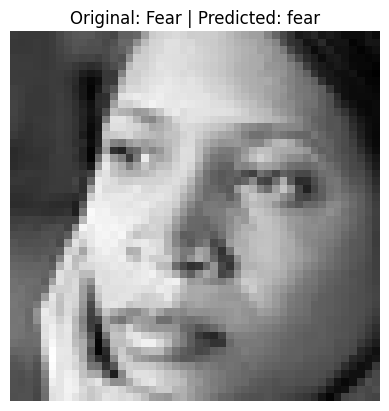

In [28]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image in grayscale mode
    img = load_img(image_path, color_mode="grayscale", target_size=(48, 48))  # Resize if needed
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array, img  # Return the array and original image object

# Example usage
image = '/kaggle/input/face-expression-recognition-dataset/images/train/fear/10040.jpg'
original_label = "Fear"  # Replace with the actual original label for the image
# print(f"Original image is of '{original_label}'")

# Preprocess the image
img_array, img = preprocess_image(image)

# Predict the label using the model
pred = model.predict(img_array)
pred_label = label[pred.argmax()]  # Assuming `label` is a list of class labels
print("Model prediction is", pred_label)

# Display the image
plt.imshow(img, cmap="gray")  # Show the image in grayscale
plt.title(f"Original: {original_label} | Predicted: {pred_label}")
plt.axis("off")  # Remove axes for better visualization
plt.show()


